# Forest Fire Burn Area Prediction - CS345 Final Project

#### - Kyle Cummings & Mike Peyton

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv("forest_fires_scikit_label_dataset.csv", sep = ",") 
print(data.head())
areaCorr = pd.DataFrame(data.corr()[12:]).to_numpy()
areaCorr = areaCorr[0][:-1:]
features = ['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

     X    Y  month  day  FFMC   DMC     DC  ISI  temp    RH  wind  rain  area
0  7.0  5.0    7.0  0.0  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0   0.0
1  7.0  4.0   10.0  5.0  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0   0.0
2  7.0  4.0   10.0  2.0  90.6  43.7  686.9  6.7  14.6  33.0   1.3   0.0   0.0
3  8.0  6.0    7.0  0.0  91.7  33.3   77.5  9.0   8.3  97.0   4.0   0.2   0.0
4  8.0  6.0    7.0  3.0  89.3  51.3  102.2  9.6  11.4  99.0   1.8   0.0   0.0


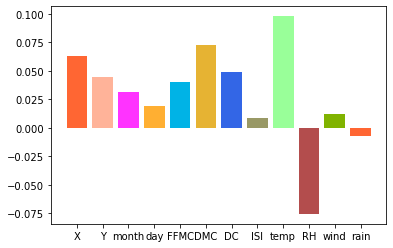

In [103]:
plt.bar(features, areaCorr, color = ['#FF6633', '#FFB399', '#FF33FF', '#FFAF32', '#00B3E6',  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D','#80B300'])
plt.show()